## Football is one of my favourite sport. And as a child i used to play a lot of games and FIFA was one of the game that i have most played, so I wanted to do some data analysis on this dataset.


So what is Fifa 19 ?

- FIFA 19 is a football video game developed by EA Vancouver. 
- It consist of players from all the clubs according to the year 2018-2019.
- It was released on 28 September 2018 for PlayStation 3, PlayStation 4, Xbox 360, Xbox One, Nintendo Switch, and Microsoft Windows.




In [37]:
#All required library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style("darkgrid")

import re
from math import pi

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score\

pd.set_option("display.max_column",150)
pd.set_option("display.max_row",100)

## Reading dataset 

In [38]:
data= pd.read_csv('.\data.csv')               
data.head(10)                               # it gives 10 the first 10 rows from the dataset

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,8

In [39]:
# Checking all the columns that are available
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [40]:
# Since each row rerpresent a players data,
print('No of Players :',data.shape[0])
print('No of Columns :',data.shape[1])

No of Players : 18207
No of Columns : 89


In [41]:
# To check if there is any NaN values
data.isnull().values.sum()

76984

In [42]:
# To check where there are NaN values more than 1000
df=pd.DataFrame(data.isnull().sum(),columns=[['null']])
df[df.iloc[:,0]>= 1000]

,null
Joined,1553
Loaned From,16943
LS,2085
ST,2085
RS,2085
LW,2085
LF,2085
CF,2085
RF,2085
RW,2085


## Checking and trying to understand why there are NaN values.


In [43]:
c=df[df.iloc[:,0]>= 1000]
col=list(c.index)
col.insert(0, "Name")
data[col]

,Name,Joined,Loaned From,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,L. Messi,"Jul 1, 2004",NaN,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,€226.5M
1,Cristiano Ronaldo,"Jul 10, 2018",NaN,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,€127.1M
2,Neymar Jr,"Aug 3, 2017",NaN,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,€228.1M
3,De Gea,"Jul 1, 2011",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€138.6M
4,K. De Bruyne,"Aug 30, 2015",NaN,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,"May 3, 2017",NaN,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2,€143K
18203,N. Christoffersson,"Mar 19, 2018",NaN,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,35+2,35+2,38+2,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2,€113K
18204,B. Worman,"Jul 1, 2017",NaN,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,38+2,38+2,44+2,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2,€165K
18205,D. Walker-Rice,"Apr 24, 2018",NaN,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,39+2,39+2,46+2,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2,€143K


### Inference from the above data
> 1) All the NaN values from LS to RB are beacuse of all the players from those rows are GK(GoalKeeper)
>
> 2) The Release Clause NaN values are of Players who do not have any release clause
>
> 3) The Loaned From NaN are players who are not loaned but playing for their respective Clubs
>
> 4) So we ignore these NaN values.

 Since all the NaN values are given with reason we are not going to do any null value imputation

In [44]:
# Showing some statistics about dataset
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [45]:
req_Cols = ["Name","Age","Nationality","Overall","Potential","Club","Value","Wage","Special","International Reputation",
            "Skill Moves","Work Rate","Position","Crossing","Finishing", "HeadingAccuracy", "ShortPassing", 
            "Volleys", "Dribbling","Curve", "FKAccuracy", "LongPassing", "BallControl", "Acceleration",
            "SprintSpeed", "Agility", "Reactions", "Balance", "ShotPower","Jumping", "Stamina", "Strength",
            "LongShots", "Aggression","Interceptions", "Positioning", "Vision", "Penalties", "Composure",
            "Marking", "StandingTackle", "SlidingTackle", "GKDiving", "GKHandling","GKKicking",
            "GKPositioning", "GKReflexes"]



# Create new dataset with the Trimmed set of columns
data_Trimmed = data[req_Cols]
req_Cols_Simple = ["Name","Age","Nationality","Overall","Potential","Club","Value","Position"]
data_Simple = data[req_Cols_Simple]

# We subtract from the potential to overall for get the possible growth of a player
data_Simple["Growth"] = data_Simple["Potential"] - data_Simple["Overall"]

C:\Users\varun\AppData\Local\Temp/ipykernel_28408/1251195163.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Simple["Growth"] = data_Simple["Potential"] - data_Simple["Overall"]


In [46]:
# Creating a new column Unit to get the units place value of the players
data_Simple['Unit'] = data_Simple['Value'].str[-1]


# Creating another column where ony the value of the player is shown
data_Simple['Value(M)'] = np.where(data_Simple['Unit'] == '0', 0,data_Simple['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
data_Simple['Value(M)'] = data_Simple['Value(M)'].astype(float)
data_Simple['Value(M)'] = np.where(data_Simple['Unit'] == 'M',data_Simple['Value(M)'],data_Simple['Value(M)']/1000)

# Droping the Unit column
data_Simple = data_Simple.drop('Unit', axis = 1)
data_Simple

C:\Users\varun\AppData\Local\Temp/ipykernel_28408/3039800284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Simple['Unit'] = data_Simple['Value'].str[-1]
C:\Users\varun\AppData\Local\Temp/ipykernel_28408/3039800284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Simple['Value(M)'] = np.where(data_Simple['Unit'] == '0', 0,data_Simple['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
C:\Users\varun\AppData\Local\Temp/ipykernel_28408/3039800284.py:7: SettingWithCopyWarning: 
A value is trying to b

,Name,Age,Nationality,Overall,Potential,Club,Value,Position,Growth,Value(M)
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,RF,0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,ST,0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,LW,1,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,GK,2,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,RCM,1,102.00
...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,CM,18,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,ST,16,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,ST,20,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,RW,19,0.06


In [47]:
# Creating a list of English League clubs
English_Leg_Clubs = [ "Chelsea","Manchester United","Manchester City","Arsenal",
                      "Bournemouth","Burnley","Cardiff City", "Crystal Palace", "Everton",
                      "Fulham",  "Huddersfield Town","Leicester City", "Liverpool",  "Newcastle United",
                      "Southampton", "Tottenham Hotspur", "Watford","West Bromwich Albion", 
                      "West Ham United", "Wolverhampton Wanderers"]
    
# We take all the players in the English League in a dataset
data_Simple_English = data_Simple[data_Simple['Club'].isin(English_Leg_Clubs)]

data_Simple_English.isnull().sum()
data_Simple_English = data_Simple_English.dropna()

In [48]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [49]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [50]:
cols = ['Age','Overall', 'Potential', 'Value', 'Wage', 'Preferred Foot',
                     'Weak Foot', 'Skill Moves', 'Work Rate', 'Position',
                     'Jersey Number', 'Height', 'Weight', 'Crossing','Finishing',
                     'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
                     'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                     'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                     'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                     'Vision', 'Penalties', 'Composure']

data[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 37 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             18207 non-null  int64  
 1   Overall         18207 non-null  int64  
 2   Potential       18207 non-null  int64  
 3   Value           18207 non-null  object 
 4   Wage            18207 non-null  object 
 5   Preferred Foot  18159 non-null  object 
 6   Weak Foot       18159 non-null  float64
 7   Skill Moves     18159 non-null  float64
 8   Work Rate       18159 non-null  object 
 9   Position        18147 non-null  object 
 10  Jersey Number   18147 non-null  float64
 11  Height          18159 non-null  object 
 12  Weight          18159 non-null  object 
 13  Crossing        18159 non-null  float64
 14  Finishing       18159 non-null  float64
 15  ShortPassing    18159 non-null  float64
 16  Volleys         18159 non-null  float64
 17  Dribbling       18159 non-null 

In [51]:
# Convert 'Value' and 'Wage'
def currency_to_numeric(val):
    if 'M' in val:
        return float(val.replace('€', '').replace('M', '').replace(',', '.')) * 1_000_000
    elif 'K' in val:
        return float(val.replace('€', '').replace('K', '').replace(',', '.')) * 1_000
    else:
        return float(val.replace('€', '').replace(',', '.'))

def height_to_numeric(height):
    if isinstance(height, str):  # Ensure height is a string
        feet, inches = height.split("'")
        feet = int(feet)
        inches = int(inches.replace('"', ''))
        return feet * 12 + inches
    return height

def weight_to_numeric(weight):
    if isinstance(weight, str):  # Ensure weight is a string
        return float(weight.replace('lbs', '').replace(',', '.'))
    return weight


In [54]:
data['Value'] = data['Value'].apply(currency_to_numeric)
data['Wage'] = data['Wage'].apply(currency_to_numeric)
data['Height'] = data['Height'].apply(height_to_numeric)
data['Weight'] = data['Weight'].apply(weight_to_numeric)
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,67.0,159.0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,74.0,183.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,69.0,150.0,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,71.0,154.0,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [58]:
data[['Age','Overall', 'Potential', 'Value', 'Wage',
                     'Weak Foot', 'Skill Moves',
                     'Jersey Number', 'Height', 'Weight', 'Crossing','Finishing',
                     'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
                     'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                     'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                     'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                     'Vision', 'Penalties', 'Composure']].corr()

,Age,Overall,Potential,Value,Wage,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Vision,Penalties,Composure
Age,1.000000,0.452350,-0.253312,0.075022,0.141145,0.059867,0.027649,-0.241156,0.082604,0.230213,0.130545,0.068660,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.187422,0.139535,0.391023
Overall,0.452350,1.000000,0.660939,0.627085,0.571926,0.212015,0.414463,-0.218931,0.038546,0.154634,0.394972,0.332515,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.498894,0.341429,0.727655
Potential,-0.253312,0.660939,1.000000,0.576218,0.486413,0.162346,0.354290,-0.010474,-0.009807,-0.006947,0.246319,0.243355,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.348141,0.224281,0.440008
Value,0.075022,0.627085,0.576218,1.000000,0.858442,0.165221,0.315651,-0.095132,0.002687,0.045943,0.249785,0.256665,0.327623,0.288243,0.272004,0.287235,0.265773,0.302175,0.308818,0.170603,0.172677,0.194259,0.540552,0.113726,0.281360,0.124515,0.210721,0.128924,0.279730,0.184639,0.140666,0.357639,0.239033,0.450352
Wage,0.141145,0.571926,0.486413,0.858442,1.000000,0.140849,0.263205,-0.086561,0.019641,0.064776,0.232834,0.217439,0.296691,0.257357,0.237150,0.259550,0.236385,0.276762,0.277615,0.124985,0.130315,0.156287,0.495560,0.088873,0.258351,0.129691,0.177562,0.139360,0.249084,0.194581,0.157415,0.315395,0.222440,0.419597
Weak Foot,0.059867,0.212015,0.162346,0.165221,0.140849,1.000000,0.340721,-0.035410,-0.174793,-0.130724,0.307925,0.357416,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.337897,0.330252,0.278132
Skill Moves,0.027649,0.414463,0.354290,0.315651,0.263205,0.340721,1.000000,-0.035194,-0.422753,-0.351209,0.741035,0.743439,0.730363,0.745077,0.839757,0.771052,0.701068,0.622342,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475,0.752980,0.347795,0.209604,0.674057,0.690434,0.586836
Jersey Number,-0.241156,-0.218931,-0.010474,-0.095132,-0.086561,-0.035410,-0.035194,1.000000,-0.039469,-0.087319,-0.076585,-0.006639,-0.100241,-0.026731,-0.028021,-0.055428,-0.068843,-0.117424,-0.073210,-0.004395,-0.015069,-0.034158,-0.192622,0.008009,-0.053860,-0.104179,-0.127822,-0.158411,-0.046174,-0.146907,-0.158526,-0.078050,-0.028023,-0.167523
Height,0.082604,0.038546,-0.009807,0.002687,0.019641,-0.174793,-0.422753,-0.039469,1.000000,0.754678,-0.486911,-0.370338,-0.366842,-0.349504,-0.493649,-0.441062,-0.404836,-0.331168,-0.416753,-0.545792,-0.465600,-0.621571,-0.021015,-0.785166,-0.292368,-0.066207,-0.288351,0.536312,-0.381480,-0.042020,-0.049883,-0.369672,-0.340664,-0.135785
Weight,0.230213,0.154634,-0.006947,0.045943,0.064776,-0.130724,-0.351209,-0.087319,0.754678,1.000000,-0.393323,-0.292407,-0.290366,-0.262884,-0.414228,-0.345941,-0.305175,-0.260863,-0.337702,-0.477853,-0.410936,-0.534264,0.086364,-0.663905,-0.191950,0.010857,-0.223317,0.615798,-0.278069,0.032396,-0.025339,-0.284113,-0.253387,-0.034444


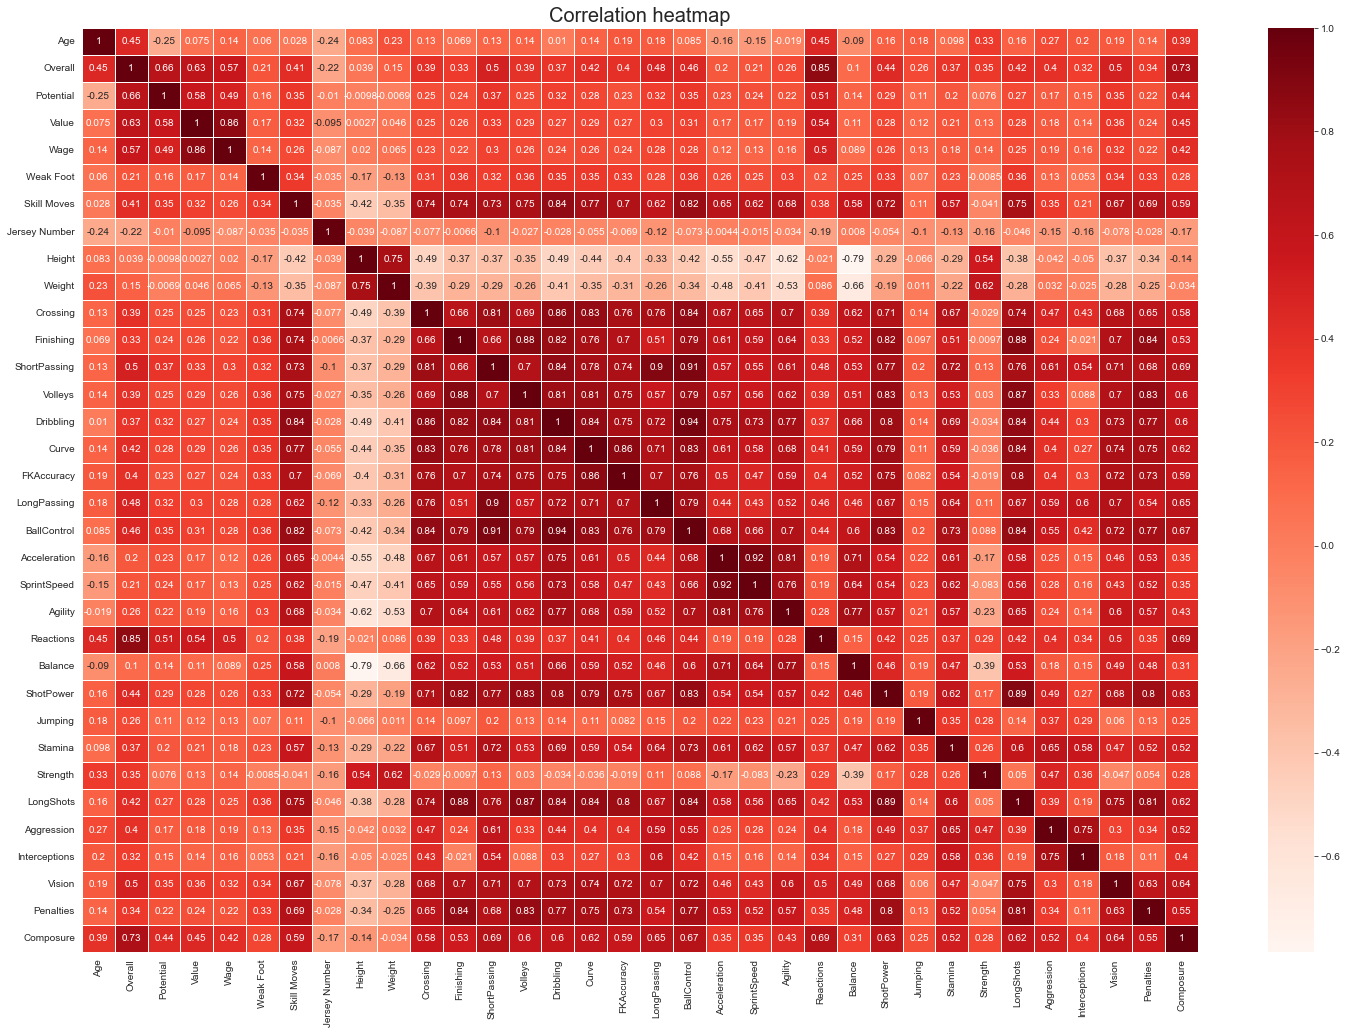

In [57]:
# Correlation heatmap between some of the features.
plt.rcParams['figure.figsize']=(25,17)
heat_m=sns.heatmap(data[['Age','Overall', 'Potential', 'Value', 'Wage',
                     'Weak Foot', 'Skill Moves',
                     'Jersey Number', 'Height', 'Weight', 'Crossing','Finishing',
                     'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 
                     'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
                     'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                     'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 
                     'Vision', 'Penalties', 'Composure']].corr(), annot = True, linewidths=.5, cmap='Reds')
heat_m.set_title(label='Correlation heatmap', fontsize=20)
plt.show()

Inference,
- Value and Wage: There is a very high correlation (0.86) between Value and Wage. This indicates that players who are valued higher in the game also tend to have higher wages.
- Dribbling and Skill Moves: A strong correlation (0.84) between Dribbling and Skill Moves suggests that players who are skilled with dribbling also tend to have high skill moves ratings
- Short Passing and Ball Control: A strong correlation (0.91) between ShortPassing and BallControl shows that players who excel in short passing generally also have excellent ball control.
- Crossing and FK Accuracy: A moderate positive correlation (0.76) between Crossing and FKAccuracy implies that players with good crossing abilities tend to also be proficient in free-kick accuracy.
- Strength and Height/Weight: Strength often correlates with height and weight, as taller or heavier individuals might have more potential for strength due to longer levers or more muscle mass.
- Height/Weight and Balance: Height and weight impact balance, with taller or heavier individuals potentially having more balance challenges due to a higher center of gravity or increased mass.

##### We can see that some stats like ,

- LongShots and Finishing (0.88): Indicates that players who are good at long shots are also effective at finishing. Both skills require precision and accuracy in shooting.

- LongShots and ShotPower (0.89): Suggests that players with strong shot power tend to excel in long shots. Power enhances the effectiveness of long-range attempts.

- LongPassing and ShortPassing (0.90): Shows that proficiency in long passing is often accompanied by skill in short passing. Both require precision and good control.

- BallControl and ShortPassing (0.91): Indicates that players with excellent ball control are also good at short passing. Effective short passing relies on precise ball control.

- BallControl and Dribbling (0.94): Demonstrates that players with high ball control are typically skilled at dribbling. Both skills involve maintaining and maneuvering the ball accurately.

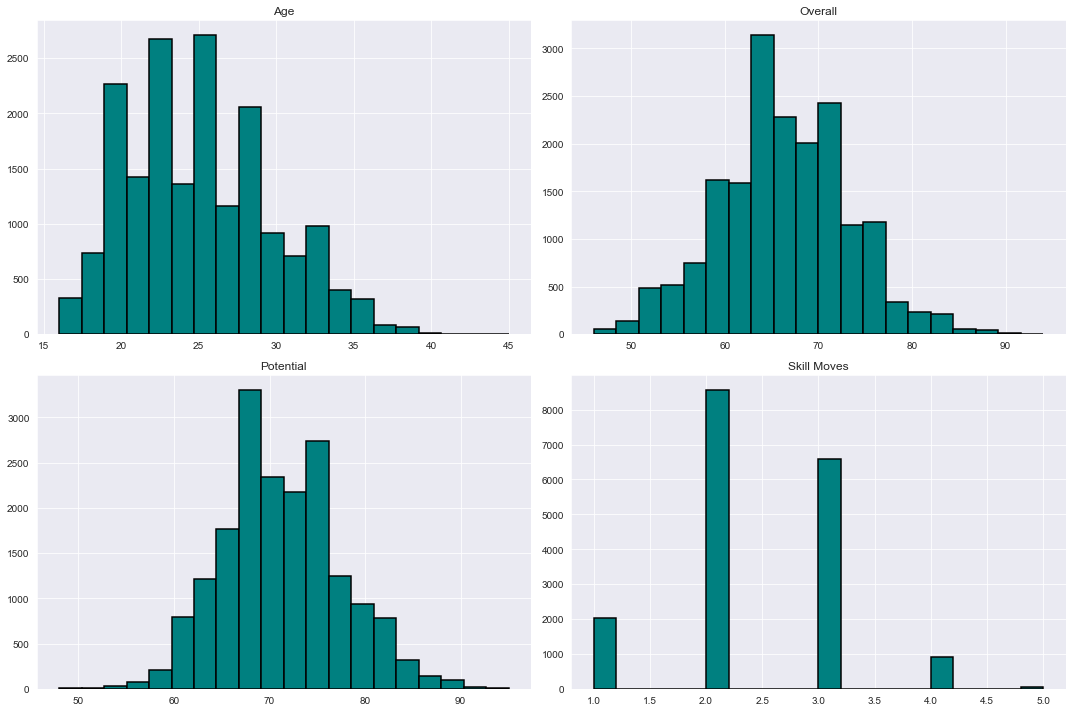

In [59]:
data[['Age','Overall','Potential','Skill Moves']].hist(figsize=(15,10),bins=20,color='teal',linewidth='1.5',edgecolor='k')
plt.tight_layout()
plt.show()

We can say from the above plots that,
- Age Group: The majority of players are between 20 and 30 years old.
- Overall Rating: Most players have an overall rating ranging from 60 to 80, indicating that the majority of players fall into this performance bracket.
- Potential: The potential of most players is between 65 and 80, suggesting a concentration of players with this range of future capability.
- Skill Moves: A significant number of players have a 2-star skill moves rating, showing that this is the most common skill level among the players.

### Getting the squad of a Club

- Since my boyhood club is chelsea im going to get the Chelsea FC squad.

In [60]:
# Defining a function to get all the players in a club
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position','Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Chelsea')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
5,E. Hazard,10.0,LF,91,Belgium,27,340000.0,93000000.0,2020
14,N. Kanté,13.0,LDM,89,France,27,225000.0,63000000.0,2023
69,Azpilicueta,14.0,RB,86,Spain,28,175000.0,35000000.0,2022
121,Jorginho,8.0,CM,84,Italy,26,155000.0,38000000.0,2023
140,Willian,22.0,RW,84,Brazil,29,175000.0,30500000.0,2020
176,M. Kovačić,17.0,LCM,83,Croatia,24,165000.0,35000000.0,"Jun 30, 2019"
177,Kepa,13.0,GK,83,Spain,23,84000.0,28500000.0,2025
200,Marcos Alonso,3.0,LB,83,Spain,27,130000.0,24000000.0,2023
209,David Luiz,30.0,LCB,83,Brazil,31,130000.0,17500000.0,2019
219,Cesc Fàbregas,4.0,CM,83,Spain,31,140000.0,22000000.0,2019


## Let us see the best players in English League and try to create a 4-3-3 formation with all the best players in it.

In [71]:
# Checking all the positions and number of players in them.
data_Simple_English.groupby('Position')[['Name']].count().reset_index().sort_values('Name')

,Position,Name
10,LF,1
3,CF,2
12,LS,5
18,RDM,6
9,LDM,6
22,RWB,6
20,RS,7
14,LWB,7
13,LW,12
21,RW,14


In [72]:
# converting both LCB and RCB into CB. (converting both into a common Center Back)

data_Simple_English['Position'][data_Simple_English['Position']=='LCB']='CB'
data_Simple_English['Position'][data_Simple_English['Position']=='RCB']='CB'

# converting both LDM and RDM into CDM. (converting both into a common Center Defencive Midfielders)

data_Simple_English['Position'][data_Simple_English['Position']=='RDM']='CDM'
data_Simple_English['Position'][data_Simple_English['Position']=='LDM']='CDM'

# converting both LCM and RCM into CM. (converting both into a common Center Midfielders)

data_Simple_English['Position'][data_Simple_English['Position']=='LCM']='CM'
data_Simple_English['Position'][data_Simple_English['Position']=='RCM']='CM'

# converting both LF and RF into LW and RW respectively.

data_Simple_English['Position'][data_Simple_English['Position']=='LF']='LW'
data_Simple_English['Position'][data_Simple_English['Position']=='RF']='RW'

# converting all RS,LS and CF into a ST. (converting all three of them into a common Striker)

data_Simple_English['Position'][data_Simple_English['Position']=='RS']='ST'
data_Simple_English['Position'][data_Simple_English['Position']=='LS']='ST'
data_Simple_English['Position'][data_Simple_English['Position']=='CF']='ST'

C:\Users\varun\AppData\Local\Temp/ipykernel_28408/2183830191.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_Simple_English['Position'][data_Simple_English['Position']=='LCB']='CB'
C:\Users\varun\AppData\Local\Temp/ipykernel_28408/2

In [73]:
# Checking the positions.
data_Simple_English.groupby('Position')[['Position']].count()

,Position
Position,
CAM,30
CB,118
CDM,36
CM,95
GK,67
LB,47
LM,38
LW,13
LWB,7


In [107]:
def get_top_players_by_position(data, position, top_n=1):
    """Get the top N players for a specific position based on overall rating."""
    return data[data['Position'] == position].nlargest(top_n, 'Overall')

def assemble_best_squad(data, formation):
    squad = []
    position_count = pd.Series(formation).value_counts()  # Count of each position in the formation
    available_players = {}  # Dictionary to store available players for each position

    # Prepare the available players for each position
    for pos in position_count.index:
        available_players[pos] = get_top_players_by_position(data, pos, position_count[pos])
    
    for pos in formation:
        if available_players[pos].empty:
            continue
        top_player = available_players[pos].iloc[0]  # Get the top player for the current position
        squad.append(top_player)
        available_players[pos] = available_players[pos].iloc[1:]  # Remove the selected player from the list
    
    return pd.DataFrame(squad)

positions = data['Position'].unique()
top_players_by_position = {}

for position in positions:
    top_players_by_position[position] = get_top_players_by_position(data, position)

# Define default formations
formations = {
    '4-4-2': ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CM', 'CM', 'RM', 'ST', 'ST'],
    '4-3-3': ['GK', 'LB', 'CB', 'CB', 'RB', 'CM', 'CDM', 'CM', 'LW', 'ST', 'RW'],
    '4-2-3-1': ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CDM', 'CAM', 'LM', 'ST', 'RM'],
    '4-1-2-1-2': ['GK', 'LB', 'CB', 'CB', 'RB', 'CM', 'CDM', 'CM', 'CAM', 'ST', 'ST'],
    '4-2-4': ['GK', 'LB', 'CB', 'CB', 'RB', 'CDM', 'CDM', 'LW', 'ST', 'ST', 'RW']
}

print('Formations: ')
print('1) 4-3-3 \n2) 4-4-2 \n3) 4-2-3-1 \n4) 4-1-2-1-2 \n5) 4-2-4\n')
n = int(input('Select a Formation: '))


formation_map = {1: '4-3-3', 2: '4-4-2', 3: '4-2-3-1', 4: '4-1-2-1-2', 5: '4-2-4'}
selected_formation = formation_map.get(n)
print(f'You have Selected the {selected_formation} formation')

best_squad = assemble_best_squad(data, formations[selected_formation])
best_squad[['Position', 'Name', 'Overall']]

Formations: 
1) 4-3-3 
2) 4-4-2 
3) 4-2-3-1 
4) 4-1-2-1-2 
5) 4-2-4

Select a Formation: 4
You have Selected the 4-1-2-1-2 formation


,Position,Name,Overall
3,GK,De Gea,91
35,LB,Marcelo,88
12,CB,D. Godín,90
42,CB,S. Umtiti,87
69,RB,Azpilicueta,86
67,CM,Thiago,86
20,CDM,Sergio Busquets,89
78,CM,S. Milinković-Savić,85
17,CAM,A. Griezmann,89
1,ST,Cristiano Ronaldo,94


## Best Features according to position,

In [111]:
# List of skill columns (based on the example provided)
skill_columns = [
    'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
    'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
    'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
    'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
    'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
    'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
    'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
]

# Group by Position and calculate mean for skill columns
position_skill_means = data.groupby('Position')[skill_columns].mean()

# Define a function to get top 3 skills
def get_top_skills(row, num= 3):
    # Get the skills and their values for the given position
    skills = row[skill_columns]
    # Sort skills by value and get the top 3
    top_skills = skills.nlargest(num).index.tolist()
    return top_skills

# Apply the function to each position
position_top_skills = position_skill_means.apply(get_top_skills, axis=1)

print(position_top_skills,3)

Position
CAM         [Balance, Agility, Acceleration]
CB       [Strength, Jumping, StandingTackle]
CDM          [Stamina, Aggression, Strength]
CF          [Agility, Balance, Acceleration]
CM          [Balance, ShortPassing, Agility]
GK     [GKReflexes, GKDiving, GKPositioning]
LAM          [Agility, Balance, SprintSpeed]
LB      [SprintSpeed, Acceleration, Stamina]
LCB      [Strength, Jumping, StandingTackle]
LCM         [Stamina, ShortPassing, Balance]
LDM        [Stamina, ShortPassing, Strength]
LF          [Balance, Agility, Acceleration]
LM      [Acceleration, SprintSpeed, Agility]
LS     [SprintSpeed, Strength, Acceleration]
LW      [Acceleration, SprintSpeed, Agility]
LWB     [SprintSpeed, Acceleration, Stamina]
RAM         [Agility, Balance, Acceleration]
RB      [SprintSpeed, Stamina, Acceleration]
RCB          [Strength, Jumping, Aggression]
RCM         [Stamina, ShortPassing, Agility]
RDM      [Stamina, ShortPassing, Aggression]
RF          [Agility, Acceleration, Balance]
R

# -------------------------------------------- End --------------------------------------------